In [1]:
%matplotlib inline
# math libs
import math
import numpy as np
from scipy.spatial import distance

# plotting libs
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import random

In [2]:
def parse_points(points):
    X = [elem[0] for elem in points]
    Y = [elem[1] for elem in points]
    Z = [elem[2] for elem in points]
    return X, Y, Z

def plot_points(points,
                size=(15,12),
                style='g.', label='No label'):
    pp = parse_points(points)
    figure = plt.figure(figsize=size)
    ax = figure.gca(projection='3d')
    ax.plot(pp[0], pp[1], pp[2], style,label=label, alpha=0.6)
    ax.set_xlabel('x axis')
    ax.set_ylabel('y axis')
    ax.set_zlabel('z axis')
    ax.legend()
    
    return ax

## Modified Weiszfeld algorhitm

Let $$d_i(y) \equiv \lVert y - x_i \rVert$$

In [3]:
def d(i, y):
    return distance.euclidean(y, x[i])        

Than $$w_i(y) = \frac{\eta_i}{d_i(y)} \Big\{  \sum\limits_{x_j \neq y}^{} \frac{n_j}{d_j(y)} \Big\} ^{-1} $$

In [4]:
def w(i, y):
    ans = eta[i] / d(i, y)
    coef = 0.
    for j in range(len(x)):
        if not np.array_equal(y, x[j]):
            coef = coef + eta[j] / d(j, y)
    return ans / coef

$$\tilde{T}: y \to \tilde{T}(y) \equiv \sum\limits_{x_i \neq y}^{} w_i(y)x_i$$

Than

$$y \to T_0(y) = \begin{cases} \tilde{T}(y), & \mbox{if } y \notin \{x_1, ... , x_m \}\\ x_k, & \mbox{if } y = x_k, k = \overline{1,m} \end{cases}$$

In [5]:
def tilde_T(y):
    ans = 0.
    for i in range(len(x)):
        if not np.array_equal(y, x[i]):
            ans = ans + w(i, y) * x[i]
    
    return ans

In [6]:
def T_0(y):
    flag = False
    for xi in x:
        if np.array_equal(y, xi):
            return xi
    
    return tilde_T(y)

Let $x_1, ... , x_m$ be m distinct points in $R^{d}$ and $\eta_1, ... , \eta_m$ be $m$ positive numbers.

In [7]:
x = np.array([        
        np.array([1,-1,1]),
        np.array([1,-1,-1]),
        np.array([1,1,1]),
        np.array([1,1,-1]),
        np.array([-1,1,1]),
        np.array([-1,1,-1]),
        np.array([-1,-1,1]),
        np.array([-1,-1,-1]),
        np.array([1.5,0,0]),
        np.array([-1.5,0,0]),
        np.array([0,1.5,0]),
        np.array([0,-1.5,0]),
        np.array([0,0,1.5]),
        np.array([0,0,-1.5])
    ])

In [8]:
eta = np.array([random.randint(1, 1e1) for i in range(len(x))])
eta

array([ 1, 10,  7,  9, 10,  1,  7,  8,  5,  7,  7,  7,  6,  7])

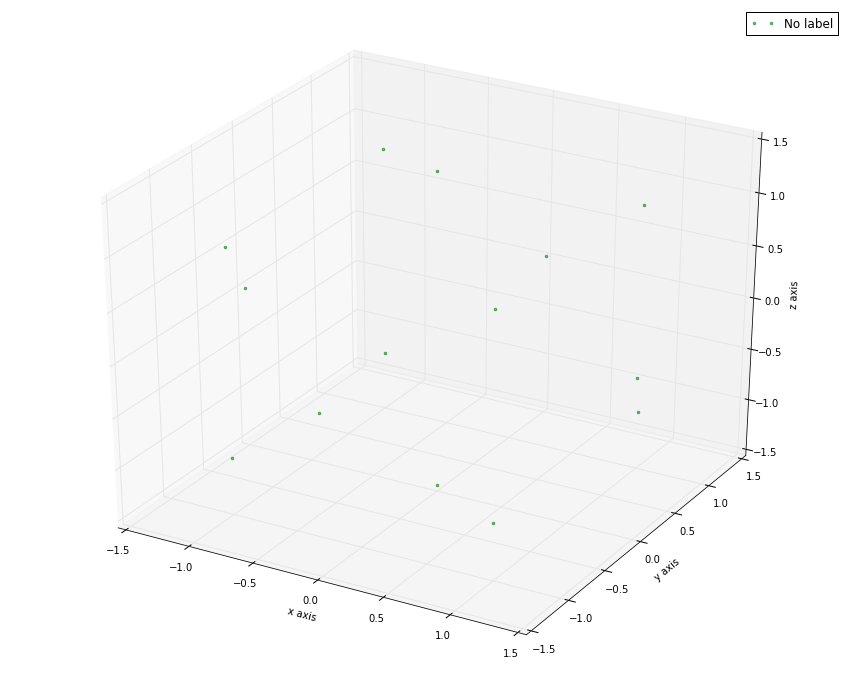

In [9]:
plot_points(x)

Let initialise $y_0$ with some values.

In [10]:
y_0 = np.array([10,10,10])

In [11]:
first = T_0(y_0)
second = T_0(first)

while not np.array_equal(first, second):
    tmp = first
    first = T_0(second)
    second = tmp
    
print(first)

[-0.03006477  0.00806252 -0.06868339]


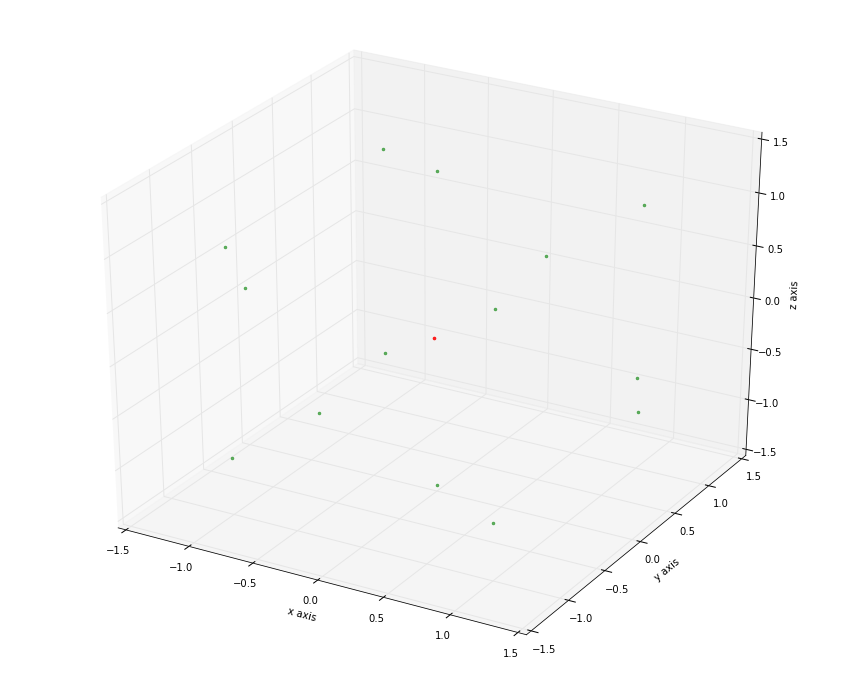

In [12]:
pp = parse_points(x)
figure = plt.figure(figsize=(15,12))
ax = figure.gca(projection='3d')
ax.plot(pp[0], pp[1], pp[2], 'g.', alpha=0.6)
pp = parse_points([tmp, tmp])
ax.plot(pp[0], pp[1], pp[2], 'r.', alpha=0.6)
ax.set_xlabel('x axis')
ax.set_ylabel('y axis')
ax.set_zlabel('z axis')

## The new algorithm

$$y \to T(y) \equiv \Big( 1 - \frac{\eta(y)}{r(y)}\Big)^{+} \tilde{T}(y) + min \Big(1, \frac{\eta(y)}{r(y)}\Big)y$$

with convention 0/0 = 0 in the computation of $\eta(y) / r(y)$, where $\tilde{T}(y)$ is

$$\tilde{T}: y \to \tilde{T}(y) \equiv \sum\limits_{x_i \neq y}^{} w_i(y)x_i,$$

$$r(y) \equiv \lVert \tilde{R}(y) \rVert,$$

$$\tilde{R}(y) = \sum\limits_{x_i \neq y}^{} \eta_i \frac{x_i - y}{\lVert x_i - y \rVert}$$